In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import mglearn

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 계층적 군집분석

In [3]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
x, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(x)

Text(0, 0.5, '특성 1')

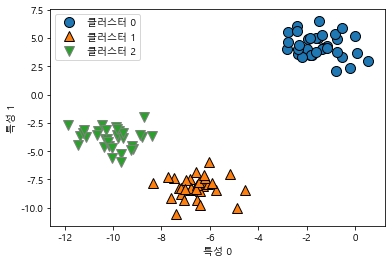

In [6]:
mglearn.discrete_scatter(x[:,0], x[:,1], assignment)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

In [7]:
from scipy.cluster.hierarchy import dendrogram, ward

Text(0, 0.5, '클러스터 거리')

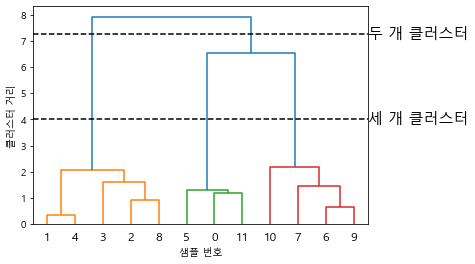

In [8]:
x, y = make_blobs(random_state=0, n_samples=12)

# 데이터 배열 x에 ward 함수를 적용해줘야 함
# 거리정보가 담긴 배열을 리턴해줌
linkage_array = ward(x)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램
dendrogram(linkage_array)

# 두 개 or 세 개 클러스터 구분 -> 클러스터 구분 라인 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center', fontdict={'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')

### DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
x, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
cluster = dbscan.fit_predict(x)

In [11]:
print('클러스터 레이블:\n', cluster)
#데이터 개수가 작거나, 데이터 특성에 따라 군집을 형성하지 않을 수 있음

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [12]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [17]:
#스케일링
#학습
#변환
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#dbscan
#학습_변환 동시에
dbscan = DBSCAN()
clusters = dbscan.fit_predict(x_scaled)

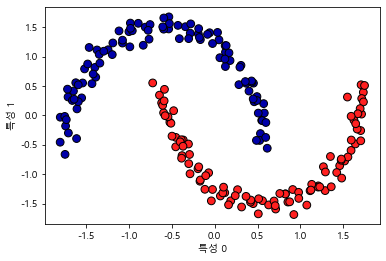

In [18]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()
#밀도 기반 알고리즘이라서 비선형적 데이터도 군집분석 가능